# PHÂN LOẠI HÌNH ẢNH
Phân loại hình ảnh là quá trình gán nhãn từ một danh mục dữ liệu cố định. Chúng tau từng biết đến hai phương pháp phân loại cổ điển đơn giản tạm gọi là ngâu thơ đó là phân cụm và KNN (K - Neighbors). Nhưng nhìn chung cả hai phương pháp trên đều có nhược điểm riêng của mình. Nếu như với phân cụm thì chúng ta cần phải ngẫu nhiên chấp nhận điểm dữ liệu ban đầu là nhãn cố định việc đó có thể đúng và sai. Nó ảnh hưởng đến kết quản gán nhãn không mong muốn.

Còn với KNN thì nó cũng có nhược điểm sau:

+ Trình phân loại sẽ sử dụng tất cả các dữ liệu để thực hiện việc so sánh (tính khoảng cách). Vì vậy nó cần lưu trữ toàn bộ dữ liệu điều này khiến tốn kém không gian lưu trữ nếu dữ liệu lớn.
+ Khi thực hiện phải tiến hành so sánh với tất cả các điểm dữ liệu khác nên khi dữ liệu lên đến vài tỉ thì thời gian thực hiện tốn kém. Bạn có muốn nhận được kết quả sau vài ngày chờ đợi hay không?

Vì vậy cần có một trình phân loại mạnh mẽ hơn. Chúng ta có thể thấy con người là loài động vật có tri thức thông minh nhất. Chúng ta có thể dễ dàng phân loại hình ảnh bằng mắt người với sự điền khiển của bộ não. Chúng ta có thể phân biệt hàng trăm người chúng ta quen với thời gian trong ms. Vậy nên một trình phân loại hiệu quả như não bộ của con người đang được các nhà phân loại học, lập trình viên mô tả.

Trước khi để có thể phân loại được hình ảnh bước quan trong chúng ta là ánh xạ dữ liệu thô từ ( hình ảnh, âm thanh..) sang dữ liệu mà máy tính có thể hiểu được. Nói một cách khác là mô tả đặc trưng của hình ảnh từ dạng raw sang dạn dữ liệu máy tính có thể hiểu ( number) được.


## 1. Phân loại tuyến tính

Mô hình ánh xạ tuyến tính có dạng là một phương trình tuyến tính. 
$f(x_i, W, b) =  W x_i + b$

Trong đó :
+ $x_i$ là ma trận tất cả các pixel của ảnh đã được làm phẳng có dạng [D x 1]. D là số đặc trừng số chiều toàn bộ dữ liệu của ảnh là một vector cột.
+ W là ma trận trọng số dùng đánh giá dữ liệu $x_i$ với mô hình đưa ra điểm số phân loại với các lớp. W có dạng ma trận   
[K x D] trong đó K là số class phân loại. $W_i$ là tham số đánh giá điểm số của lớp thứ i.
+ b vector sai lệch thường có xuất hiện trong một phương trình tuyến tính y = ax + b nó ảnh hưởng đến đầu ra, nhưng lại không can thiệp vào dữ liệu đầu vào.

Rút ra : 
   + $W x_i$ đánh giá điểm số của dữ liệu với toàn bộ K class.
   + Chúng ta có thể điều chỉnh được tham số W, b sao cho nó khớp với mô hình học tập và tạo nên một mô hình nên vì vậy ta chỉ cần tìm các tham số này chúng ta có thể fix nó với dữ liệu sau. Không cần lưu trữ các dữ liệu train ban đầu.
   + Việc phân loại hình ảnh theo mô hình này chỉ gồm phép nhân, cộng ma trận. Nhanh hơn đáng kể sao với phương pháp ngay thô bên trên.
   ######     Toàn bộ điều này khắc phục được nhược điểm đưa ra của trình phân loại ngây thơ bên trên ( không gian, tốc độ, hiểu quả). 




## 2. Diễn tả một phân loại tuyến tính

Một bộ phân loại tuyến tính sẽ tính điểm của dữ liệu đầu vào với các class cần phân loại. Nhưng tùy thuộc vào độ chính xác của trọng số mà nó có thể đúng hoặc sai so với thực tế. 

![Division class](linear.jpeg)

Đường màu đỏ minh họa cho điểm bằng 0 dữ liệu là oto. Hướng mũi tên tức càng đi theo chiều đó điểm càng dương khảng năng càng chính xác. Tương tự với các đường màu khác. Như vậy đánh giá điểm của các class từ dữ liệu cho ta biết được khả năng nằm ở của dữ liệu đó nằm ở nhóm nào.

+ Biểu diễn tham số W, b, $x_i$

![](wb.jpeg)
Bằng cách biểu diễn mở rộng ma trận $x_i$ và W ta có được phương trình điểm số :
$f(x_i, W) =  W x_i$
+ Xử lí dữ liệu :
 
 Chúng ta đang trích xuất dữ liệu dưới dạng pixel với số chiều 32*32*3 (RGB) các giá trị nằm trong khoảng [0,255]. Và chúng ta muốn cho dữ liệu tập chung giúp việc dễ ràng tạo mô hình có 2 cách phổ biến đó là từ dữ liệu ta trừ cho giá trị trung bình. Với hình ảnh khi làm vậy giá trị nằm trong khoảng [-127, 127]. Cách khác ta có thể chia tỉ lệ đầu vào sao cho dữ liệu nằm trong khoảng [-1,1].

## Hàm mất mát ( Loss Function)

Quan sát hình dưới đây:
![](cat.jpg)

Do ma trận weight chưa đủ tốt nên điểm số lớp đó là cát (-96,8), dog(437,9), ship(61,95) nên trình phân loại đã nhận nhầm đó là dog. Và kết quả đó khiến chúng ta không hài lòng. Nên chúng ta cần có một hàm loss function để đánh giá mức độ hài lòng. Khi giá trị hàm số càng cào thì kết quả phân loại càng kém và ngược lại.

Chúng ta phát triển một máy hỗ trợ đa lớp mất mát(SVM). SVM muốn là mỗi hình ảnh ở lớp chính xác cao hơn điểm của hình ảnh tại các lớp không chính xác bởi một hằng số ưu tiên ( cố định ) kí hiệu là : $\Delta$.


Với bộ dữ liệu thứ i là $(x_i, y_i)$ là dữ liệu và nhãn chính xác. Hàm tính điểm $f(x_i, W)$ đưa ra vector điểm $s$, điểm cho lớp j là $s_j = f(x_i, W)_j$. Hàm mất mát theo SVM cho dữ liệu thứ i:

$L_i = \sum_{j\neq y_i} \max(0, s_j - s_{y_i} + \Delta)$



Có một lỗi với chức năng mất chúng tôi đã trình bày ở trên. Giả sử rằng chúng ta có một tập dữ liệu và một tập hợp các tham số W phân loại chính xác mọi ví dụ (nghĩa là tất cả các điểm đều sao cho tất cả các lề được đáp ứng và Li = 0 cho tất cả i). Vấn đề là bộ W này không nhất thiết phải là duy nhất: có thể có nhiều W tương tự phân loại chính xác các ví dụ. Một cách dễ dàng để thấy điều này là nếu một số tham số W phân loại chính xác tất cả các ví dụ (vì vậy độ mất bằng 0 cho mỗi ví dụ), thì bất kỳ bội số nào của các tham số này λW trong đó λ> 1 cũng sẽ mất 0 vì phép biến đổi này trải đều tất cả các cường độ điểm và do đó cũng là sự khác biệt tuyệt đối của họ. Ví dụ: nếu chênh lệch điểm giữa một lớp đúng và một lớp không chính xác gần nhất là 15, thì nhân tất cả các phần tử của W với 2 sẽ tạo ra sự khác biệt mới 30.

Nói cách khác, chúng tôi muốn mã hóa một số ưu tiên cho một nhóm trọng số W nhất định so với các trọng số khác để loại bỏ sự mơ hồ này. Chúng ta có thể làm như vậy bằng cách mở rộng hàm mất mát với hình phạt chính quy R (W). Hình phạt chính quy hóa phổ biến nhất là định mức L2 không khuyến khích các trọng số lớn thông qua hình phạt bậc hai theo nguyên tố trên tất cả các tham số:

$R(W) = \sum_k\sum_l W_{k,l}^2$

Chúng ta sẽ ưu tiên các bộ số có mức hình phạt thấp hơn.  
Khi đó SVM loss trở thành :
$L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} $

Chúng ta cùng xét ví dụ sau để hiểu hơn nội dụng của đoạn trên:
Tôi có vector dữ liệu là x = [1,1,1,1], và hai ma trận trọng số weight là $w_1$ = [1,0,0,0] và $w_2$ = [0.25,0.25,0.25,0.25]
Điểm cho ra của $x.w_1$ = $x.w_2$. Nhưng w1 có hình phạt $R(w_1) = 1$, $R(w_2) = 0.25$. 
Khi đó với $w_2$ chúng ta sẽ được hàm loss nhỏ hơn. 

Thực hiện code hàm Loss trên:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle 
import numpy as np
import os
from scipy.misc import imread
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        datadict = pickle.load(fo, encoding='bytes')
    
    Y = datadict[b'labels']
    X = datadict[b'data']
    
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y
def load_CIFAR10(ROOT):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = unpickle(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = unpickle(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [3]:
cifar10_dir = 'F:\DataML\cifar-10-python\cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Mỗi hàng của mảng lưu trữ một hình ảnh màu 32x32. 1024 mục đầu tiên chứa các giá trị kênh màu đỏ, 1024 mục tiếp theo màu xanh lục và 1024 mục cuối cùng màu xanh lam. Hình ảnh được lưu theo thứ tự chính hàng, sao cho 32 mục đầu tiên của mảng là giá trị kênh màu đỏ của hàng đầu tiên của hình ảnh.

In [83]:
# Thử in ra một mẫu dữ liệu trong tập dữ liệu:
print(X_train[0,:])

[[[ 59.  62.  63.]
  [ 43.  46.  45.]
  [ 50.  48.  43.]
  ...
  [158. 132. 108.]
  [152. 125. 102.]
  [148. 124. 103.]]

 [[ 16.  20.  20.]
  [  0.   0.   0.]
  [ 18.   8.   0.]
  ...
  [123.  88.  55.]
  [119.  83.  50.]
  [122.  87.  57.]]

 [[ 25.  24.  21.]
  [ 16.   7.   0.]
  [ 49.  27.   8.]
  ...
  [118.  84.  50.]
  [120.  84.  50.]
  [109.  73.  42.]]

 ...

 [[208. 170.  96.]
  [201. 153.  34.]
  [198. 161.  26.]
  ...
  [160. 133.  70.]
  [ 56.  31.   7.]
  [ 53.  34.  20.]]

 [[180. 139.  96.]
  [173. 123.  42.]
  [186. 144.  30.]
  ...
  [184. 148.  94.]
  [ 97.  62.  34.]
  [ 83.  53.  34.]]

 [[177. 144. 116.]
  [168. 129.  94.]
  [179. 142.  87.]
  ...
  [216. 184. 140.]
  [151. 118.  84.]
  [123.  92.  72.]]]


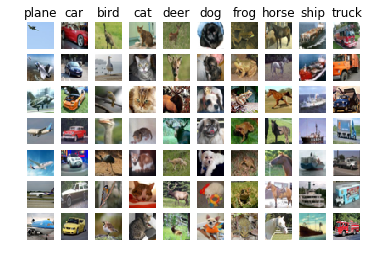

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

Chuyển dữ liệu về ma trận:

In [4]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


Trước khi bắt tay vào thực hiện vào việc code cho SVM thử dùng thư viện và xem xét mô hình được khoảng bao nhiêu phần trăm hiệu quả.

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto').fit(X_train, y_train)
pre = clf.predict(X_test)
print ("Xac xuat dự đoán chính xác : %.2f %%" %(100*accuracy_score(y_test, pre.tolist())) )

Nó chạy khá lâu và tôi đợi mãi nhưng nó vẫn không đưa ra được kết quả, vấn đề có lẽ là dữ liệu đầu vào quá lớn, dẫn đến việc tính toán đưa ra kết quả quá lớn ảnh hưởng đến hiệu suất hoạt động của thuật toán. Chúng ta sẽ phải xử lí dữ liệu đi để đầu vào nhỏ hơn ( tập chung hơn).

In [5]:
mean_photo = np.mean(X_train, axis = 0) 
X_train = X_train - mean_photo
X_test = X_test - mean_photo

Mở rộng ma trận ( thêm hệ số bias vào ma trận )

In [6]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 3073)
Training labels shape:  (50000,)
Test data shape:  (10000, 3073)
Test labels shape:  (10000,)


Bây giờ ta viết hàm mất mát và đạo hàm của chúng.

Ta có $L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss}$

Với phần data_loss mặc dù hàm max là convex nhưng nó không có đạo hàm tại mọi nơi. Cụ thể:
$\begin{eqnarray}
\frac{\partial }{\partial \mathbf{w}_{y_n}}\max(0, 1 - \mathbf{w}_{y_n}^T \mathbf{x}_n + \mathbf{w}_j^T\mathbf{x}_n) &=& 
\left\{
\begin{matrix}
0 & \text{if}& 1 - \mathbf{w}_{y_n}^T \mathbf{x}_n + \mathbf{w}_j^T\mathbf{x}_n < 0 \\
-\mathbf{x}_n & \text{if} &1 - \mathbf{w}_{y_n}^T \mathbf{x}_n + \mathbf{w}_j^T\mathbf{x}_n > 0
\end{matrix}
\right. && ~~~~(5)\\
\frac{\partial }{\partial \mathbf{w}_{j}}\max(0, 1 - \mathbf{w}_{y_n}^T \mathbf{x}_n + \mathbf{w}_j^T\mathbf{x}_n) &=& 
\left\{
\begin{matrix}
0 & \text{if}& 1 - \mathbf{w}_{y_n}^T \mathbf{x}_n + \mathbf{w}_j^T\mathbf{x}_n < 0 \\
\mathbf{x}_n & \text{if} &1 - \mathbf{w}_{y_n}^T \mathbf{x}_n + \mathbf{w}_j^T\mathbf{x}_n > 0
\end{matrix}
\right. && ~~~~(6)
\end{eqnarray}$

Rõ ràng là các đạo hàm này không xác định tại các điểm mà $1 - \mathbf{w}_{y_n}^T \mathbf{x}_n + \mathbf{w}_j^T\mathbf{x}_n = 0$. Tuy nhiên, khi thực hành, ta có thể giả sử rằng tại 0, các đạo hàm này cũng bằng 0.

Để dễ hình dung hơn thì chúng ta có thể quan sát hình sau:
![](vectorized_loss.png)
Còn về phần regularization loss đơn giản hơn nên chúng ta đạo hàm như một biến W.

In [42]:
def Loss_SVM_and_Grad(X, Y, W, anpha):
    #-----------------HÀM TÍNH LOSS-----------------------
    nc = W.shape[0] # number of class
    denta = 1
    Scores = W.dot(X) # (d * N) 
    # Điểm của mỗi class nằm trên một cột
    N = X.shape[1]
    d = X.shape[0]
    corect_score_class = np.zeros(N)
    for i in range(N):
        t = Scores[Y[i],i]
        corect_score_class[i] = t
    margins = np.maximum(0,Scores -  corect_score_class + denta)
    for i in range(margins.shape[1]):
        margins[Y[i]][i] = 0
    loss = np.sum(margins, axis = 0)
    loss = np.sum(loss)
    data_loss = loss/N
    regu_loss = anpha * np.sum(W*W)
    Loss_SVM = data_loss + regu_loss
    
    #-------------------Đạo hàm hàm loss-------------------------
    
    grad_regu_loss = anpha * 2 * W
    F = (margins > 0).astype(int)
    a = np.sum(-F, axis = 0)
    for i in range(4):
        F[Y[i],i] = a[i]

    grad_data_loss = X.dot(F.T)/N # w tren mot hang doc
    
    grad = grad_data_loss.T + grad_regu_loss
    
    return (Loss_SVM,grad)
np.random.seed(2)
W = np.random.randn(10, 3073) * 0.0001 
X_code = X_train.T
(Loss, Grad) =Loss_SVM_and_Grad(X_code, y_train, W, .1)
print("Loss : ",Loss)
print("Grad : \n", Grad)

def MGD(W, X, y, eta):
    w = [W]
    loss = [0]
    for it in range(1000):
        a = np.random.randint(0,50000,1000)
        Data = X_train[a,:] 
        Label = y_train[a]
        (Loss, Grad) = Loss_SVM_and_Grad(Data.T, Label, w[-1], .1)
        if(it % 100 == 0):
            print("it / 1000 : ",it )
            print("Loss : ", Loss)
        loss.append(Loss)
        W_new = W[-1] - eta * Grad
        w.append(W_new)
    return(loss,w)
(Loss,w) = MGD(W, X_train, y_train, 0.0000001)

Loss :  9.230102061756403
Grad : 
 [[-1.75861637 -2.74671639 -4.74877162 ... -0.95638914 -2.27006091
   0.8873216 ]
 [-1.9855614  -1.38721561 -1.46518654 ... -2.29718823 -3.12311191
   0.86946928]
 [ 0.49552924  0.47620691  1.71993448 ...  0.10556778  0.86581968
   0.88930578]
 ...
 [-0.53247536 -0.64317703 -0.64690896 ... -1.16297651  0.30084919
   0.89377576]
 [-1.6865633  -2.91527961 -5.25240812 ...  0.38875116 -1.95103025
   0.87097147]
 [-4.12268712 -4.51460096 -5.52791345 ... -0.92792921 -1.35319391
   0.88907878]]
it / 1000 :  0
Loss :  9.122602901251998
it / 1000 :  100
Loss :  8.901506308049086
it / 1000 :  200
Loss :  8.92397678189275
it / 1000 :  300
Loss :  8.915564057740633
it / 1000 :  400
Loss :  8.914853952420435
it / 1000 :  500
Loss :  8.911766854869107
it / 1000 :  600
Loss :  8.910990334154967
it / 1000 :  700
Loss :  8.909231170268143
it / 1000 :  800
Loss :  8.911031187653213
it / 1000 :  900
Loss :  8.931477176795008


In [43]:
poss_loss_min = np.argmin(Loss)
W_priority = w[poss_loss_min - 1]
Scores_priority = W_priority.dot(X_test.T)

res = np.argmax(Scores_priority, axis = 0)
print(res.shape)
from sklearn.metrics import accuracy_score
print ("Xac xuat SVM code tay : %.2f %%" %(100*accuracy_score(y_test, res.tolist())) )

(10000,)
Xac xuat SVM code tay : 25.25 %


Tối ưu hàm đạo hàm để tìm w mục tiêu sao cho hàm loss nhỏ nhất có thể tôi dùng thuật toán SGD để tìm đạo hàm. Tôi thực hiện khoảng 1000 vòng.

In [10]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_test, y_test, test_size=5000)
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000, tol = 9.498 ).fit(X1_train, y1_train)
pre = clf.predict(X1_test)
from sklearn.metrics import accuracy_score
print ("Xac xuat SGD : %.2f %%" %(100*accuracy_score(y1_test, pre.tolist())) )

Xac xuat SGD : 15.88 %


Bây giờ chúng ta thử với thuật toán SVM có sẵn trong thư viện xem sao.

In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='poly', degree= 10)  
svclassifier.fit(X_train, y_train)  
y_pred = svclassifier.predict(X_test) 
from sklearn.metrics import accuracy_score
print ("Xac xuat SVM POLY : %.2f %%" %(100*accuracy_score(y1_test, y_pred.tolist())) )

C:\Users\trung\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import accuracy_score
print ("Xac xuat SVM hạt nhân Gau : %.2f %%" %(100*accuracy_score(y1_test, y_pred.tolist())) )

In [46]:
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_test, y_test) 
y_pred = clf.predict(X_train)
from sklearn.metrics import accuracy_score
print ("Xac xuat sử dụng thư viện : %.2f %%" %(100*accuracy_score(y_train, y_pred.tolist())) )

Xac xuat SVM hạt nhân Gau : 11.73 %


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', degree = 3, gamma=1, C = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print ("Xac xuat sử dụng thư viện : %.2f %%" %(100*accuracy_score(y_train, y_pred.tolist())) )